In [2]:
from collections import defaultdict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from UNSW_NB15_config import UNSW_NB15_Config

COL_NAMES = UNSW_NB15_Config.COL_NAMES

SOURCE_COL = UNSW_NB15_Config.SOURCE_IP_COL_NAME
DESTINATION_COL = UNSW_NB15_Config.DESTINATION_IP_COL_NAME
LABEL_COL = UNSW_NB15_Config.IS_ATTACK_COL_NAME
CATEGORY_COL = UNSW_NB15_Config.ATTACK_CLASS_COL_NAME

BENIGN_CLASS_NAME = UNSW_NB15_Config.BENIGN_CLASS_NAME


179
defaultdict(<class 'list'>, {'Normal': [93, 200, 24, 6720, 1021, 20, 6255, 97, 25, 6594, 6593, 7996, 21, 6425, 34, 6412, 25, 6728, 17, 6695, 1333, 6730, 1303, 1378, 29, 18, 22, 4515, 6642, 1457, 1435, 1306, 1005, 0, 153, 70, 8, 2, 1, 135, 3, 6166, 5, 6031, 12, 6168, 5, 5896, 6010, 5, 5966, 5972, 5, 5, 5787, 6174, 6, 17, 6206, 12, 81, 176, 54, 0, 48, 6793, 1867, 10973, 1734, 18632, 1526, 2046, 1453, 6691, 1882, 0, 94, 0, 6, 4, 1872, 0, 2682, 0, 2836, 2448, 0, 2705, 0, 2705, 0, 2693, 1681, 0, 2527, 0, 2595, 2020, 35320, 0, 2621, 0, 2682, 29359, 1788, 2677, 1750, 11397, 0, 2289, 36, 0, 0, 11, 30, 44, 21, 23, 0, 90, 6, 2, 3023, 23, 43, 60, 79867, 1, 4198, 4100, 0, 0, 4295, 0, 3030, 42205, 8655, 0, 3928, 0, 4022, 0, 4119, 0, 3661, 3620, 0, 3909, 4220, 4081, 2915, 8615, 0, 4190, 0, 3513, 0, 171, 0, 61, 14, 35, 8], 'Reconnaissance': [13, 1], 'Exploits': [0, 1, 578, 6, 1571, 0, 3120, 1, 8399], 'Fuzzers': [1084, 4226, 12, 2603], 'DoS': [4]})


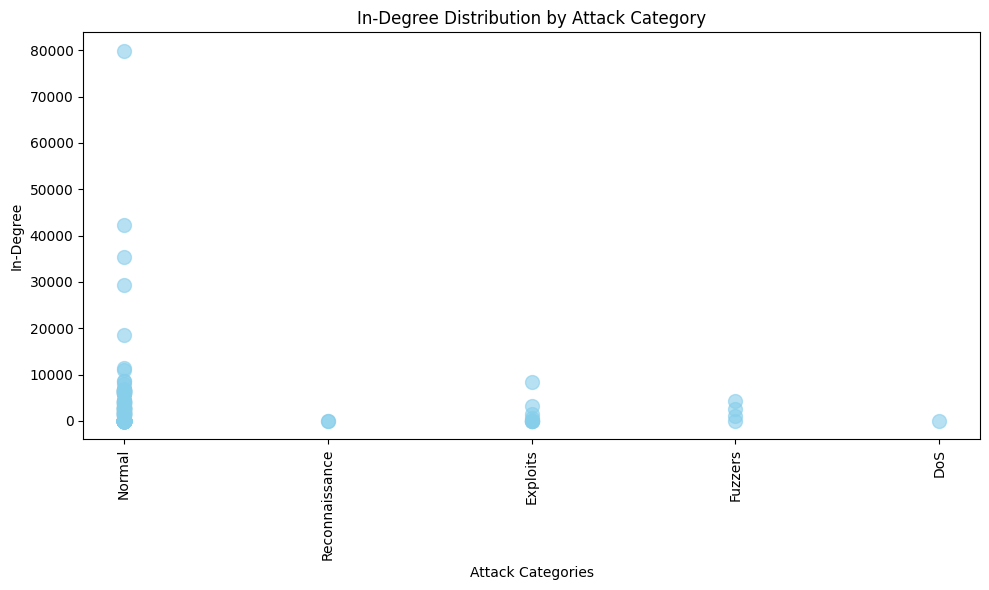

In [3]:

df = pd.read_csv('./All/all_downsampled.csv')

G = nx.MultiDiGraph()

# G.add_nodes_from(df[SOURCE_COL].unique())
# G.add_nodes_from(df[DESTINATION_COL].unique())

G.add_edges_from(
    (row[SOURCE_COL], row[DESTINATION_COL], {'attack_category': row[CATEGORY_COL], 'label': row[LABEL_COL]})
    for _, row in df.iterrows()
)

category_in_degrees = defaultdict(list)

for node in G.nodes:
    in_edges = G.in_edges(node, data=True)
    out_edges = G.out_edges(node, data=True)

    attacker = False
    for _, _, data in out_edges:
        if data.get('label') == 1:  # Check if the edge is labeled as an attack
            attacker = True
            category = data.get('attack_category', 'Unknown')
            category_in_degrees[category].append(len(in_edges))
            break

    if not attacker:
        category_in_degrees[BENIGN_CLASS_NAME].append(len(in_edges))

plt.figure(figsize=(10, 6))

print(len(G.nodes))
print(category_in_degrees)

# Prepare data for scatter plot
categories = []
in_degrees = []

for category, degrees in category_in_degrees.items():
    categories.extend([category] * len(degrees))
    in_degrees.extend(degrees)

plt.scatter(categories, in_degrees, color='skyblue', s=100, alpha=0.6)
plt.xlabel('Attack Categories')
plt.ylabel('In-Degree')
plt.title('In-Degree Distribution by Attack Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
def print_attack_node_and_their_in_traffic(df):

    # Strip whitespaces 
    df.columns = df.columns.str.strip()
    
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Find all attacker nodes
    attacker_nodes = df[df[CATEGORY_COL] != BENIGN_CLASS_NAME][SOURCE_COL].unique()
    print("Attacker Nodes:", attacker_nodes)

    # Find all traffic where attacker node is the destination
    directed_to_attacker_traffic = df[df[DESTINATION_COL].isin(attacker_nodes)]

    # Find all nodes that have directed traffic to attacker nodes
    source_node_to_attacker = directed_to_attacker_traffic[SOURCE_COL].unique()
    print("Source Node to Attacker:", source_node_to_attacker)

    attack_directed_to_attacker_traffic = directed_to_attacker_traffic[directed_to_attacker_traffic[CATEGORY_COL] != BENIGN_CLASS_NAME]
    
    print("Example Attacks on Attacker Nodes:", attack_directed_to_attacker_traffic.groupby(SOURCE_COL).head(1))

    print("Source Node to Attacker with Attack Traffic:", attack_directed_to_attacker_traffic[SOURCE_COL].unique())

    print("No of Attacks on Attacker Nodes:", len(attack_directed_to_attacker_traffic))

    directed_to_attacker_traffic_attack_type = directed_to_attacker_traffic[CATEGORY_COL].unique()
    print("Traffic to Attacker Nodes Attack Type:", directed_to_attacker_traffic_attack_type)

print_attack_node_and_their_in_traffic(df)

/tmp/ipykernel_3223099/1409605082.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Attacker Nodes: ['175.45.176.0_0' '175.45.176.3_0' '175.45.176.2_0' '175.45.176.1_0'
 '175.45.176.0_1' '175.45.176.3_1' '175.45.176.1_1' '175.45.176.2_1'
 '175.45.176.0_2' '175.45.176.1_2' '175.45.176.2_2' '175.45.176.3_2'
 '175.45.176.2_3' '175.45.176.0_3' '175.45.176.3_3' '175.45.176.1_3']
Source Node to Attacker: ['149.171.126.18_0' '149.171.126.11_0' '149.171.126.15_0'
 '149.171.126.17_1' '149.171.126.18_1' '149.171.126.12_1'
 '149.171.126.11_2' '149.171.126.13_2' '149.171.126.14_2'
 '149.171.126.17_2' '10.40.85.1_2' '149.171.126.10_2' '149.171.126.18_2'
 '149.171.126.18_3' '149.171.126.12_3' '10.40.85.1_3' '149.171.126.15_3'
 '149.171.126.13_3']
Example Attacks on Attacker Nodes: Empty DataFrame
Columns: [srcip, sport, dstip, dsport, proto, state, dur, sbytes, dbytes, sttl, dttl, sloss, dloss, service, Sload, Dload, Spkts, Dpkts, swin, dwin, stcpb, dtcpb, smeansz, dmeansz, trans_depth, res_bdy_len, Sjit, Djit, Stime, Ltime, Sintpkt, Dintpkt, tcprtt, synack, ackdat, is_sm_ips_ports

In [5]:
attack_traffic = df[df[LABEL_COL] == 1]

# Group attack traffic by destination IP and attack category, and count occurrences
attack_traffic_grouped = attack_traffic.groupby([DESTINATION_COL, CATEGORY_COL])

# Print the number of rows in the grouped DataFrame
print(attack_traffic_grouped.size())

dstip             attack_cat    
149.171.126.10_0  Backdoors           1
                  DoS                67
                  Exploits          437
                  Fuzzers           460
                  Generic            54
                                   ... 
149.171.126.19_3  Fuzzers           751
                  Generic           152
                  Reconnaissance    436
                  Shellcode          63
                  Worms               4
Length: 347, dtype: int64


In [6]:
import os
def find_both_attacker_and_victim(df):
    # Strip whitespaces from columns and string values
    df.columns = df.columns.str.strip()
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    df.loc[df[LABEL_COL] == 0, CATEGORY_COL] = BENIGN_CLASS_NAME

    # Find all attacker nodes (source IPs with attack category not benign)
    attacker_nodes = set(df[df[CATEGORY_COL] != BENIGN_CLASS_NAME][SOURCE_COL].unique())
    # Find all victim nodes (destination IPs with attack label)
    victim_nodes = set(df[df[LABEL_COL] == 1][DESTINATION_COL].unique())

    # Nodes that are both attacker and victim
    both_attacker_and_victim = attacker_nodes & victim_nodes

    for node in both_attacker_and_victim:
        # Print one row where this node is an attacker (source of attack)
        attacker_traffic = df[(df[SOURCE_COL] == node) & (df[CATEGORY_COL] != BENIGN_CLASS_NAME)]
        print("Attacker traffic (as source):")
        print(attacker_traffic.head(1))

        # Print one row where this node is a victim (destination of attack)
        victim_traffic = df[(df[DESTINATION_COL] == node) & (df[LABEL_COL] == 1)]
        print("Victim traffic (as destination):")
        print(victim_traffic.head(1))

    print("Nodes that are both attacker and victim:", both_attacker_and_victim)
    print("Count:", len(both_attacker_and_victim))


# Directory containing the CSV files
directory = './Raw'

# Iterate through all CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        print(f"Processing file: {filename}")
        
        # Read the CSV file
        file_df = pd.read_csv(file_path, header=None, names=COL_NAMES)
        
        # Run the function
        find_both_attacker_and_victim(file_df)

Processing file: UNSW-NB15_1.csv


/tmp/ipykernel_3223099/2397814476.py:42: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  file_df = pd.read_csv(file_path, header=None, names=COL_NAMES)
/tmp/ipykernel_3223099/2397814476.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Nodes that are both attacker and victim: set()
Count: 0
Processing file: UNSW-NB15_2.csv


/tmp/ipykernel_3223099/2397814476.py:42: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  file_df = pd.read_csv(file_path, header=None, names=COL_NAMES)
/tmp/ipykernel_3223099/2397814476.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Nodes that are both attacker and victim: set()
Count: 0
Processing file: UNSW-NB15_4.csv


/tmp/ipykernel_3223099/2397814476.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Nodes that are both attacker and victim: set()
Count: 0
Processing file: UNSW-NB15_3.csv


/tmp/ipykernel_3223099/2397814476.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Nodes that are both attacker and victim: set()
Count: 0
